In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
import shutil

%matplotlib inline


In [13]:
from tensorflow import keras

In [12]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import itertools

Using TensorFlow backend.


In [2]:
os.path.join('storage','hisp','train_labels.csv')

'storage/hisp/train_labels.csv'

In [3]:
df = pd.read_csv(os.path.join('storage','hisp','train_labels.csv'))
df.head()
train_path = 'storage/hisp/train/'
test_path = 'storage/hisp/test/'

In [4]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [5]:
TRAIN_DIR = train_path

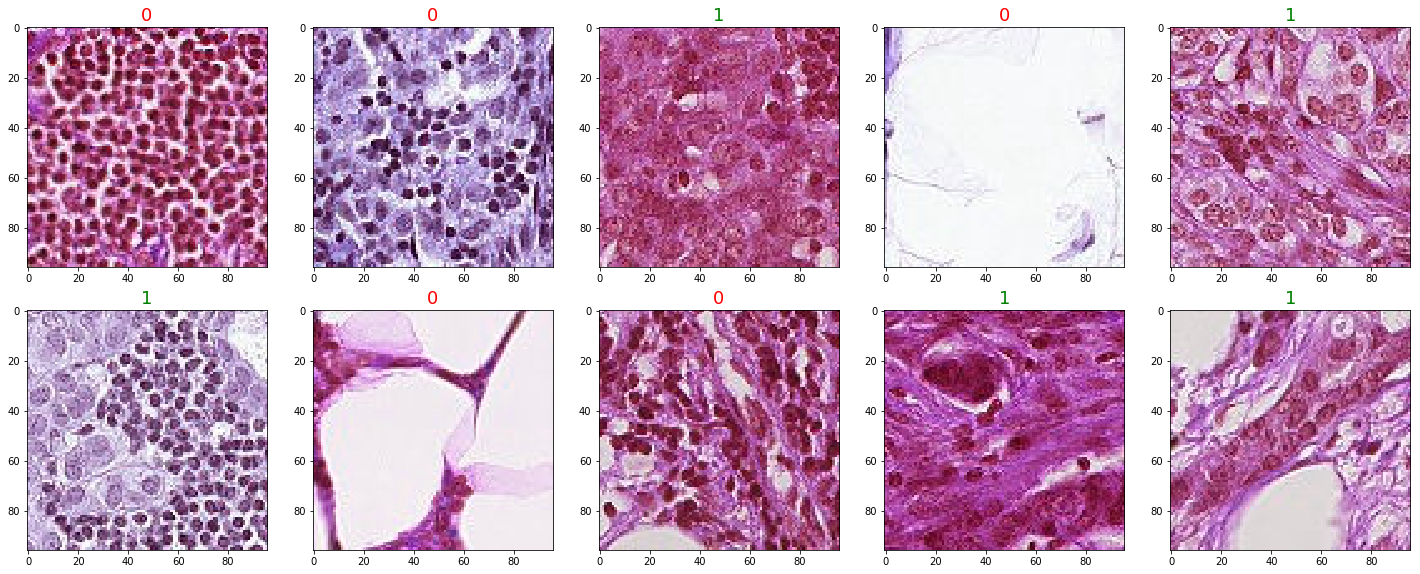

In [6]:
fig = plt.figure(figsize = (20,8))
index = 1
for i in np.random.randint(low = 0, high = df.shape[0], size = 10):
    file = TRAIN_DIR + df.iloc[i]['id'] + '.tif'
    img = cv2.imread(file)
    ax = fig.add_subplot(2, 5, index)
    ax.imshow(img, cmap = 'gray')
    index = index + 1
    color = ['green' if df.iloc[i].label == 1 else 'red'][0]
    ax.set_title(df.iloc[i].label, fontsize = 18, color = color)
plt.tight_layout()
plt.show()

In [7]:
# removing this image because it caused a training error previously
df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

# removing this image because it's black
df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [8]:
SAMPLE_SIZE = 80000
# take a random sample of class 0 with size equal to num samples in class 1
df_0 = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 0)
# filter out class 1
df_1 = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 0)

# concat the dataframes
df_train = pd.concat([df_0, df_1], axis = 0).reset_index(drop = True)
# shuffle
df_train = shuffle(df_train)

df_train['label'].value_counts()

1    80000
0    80000
Name: label, dtype: int64

In [9]:
# train_test_split
# stratify=y creates a balanced validation set.
y = df_train['label']

df_train, df_val = train_test_split(df_train, test_size = 0.1, random_state = 0, stratify = y)

NameError: name 'train_test_split' is not defined

In [ ]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#Folder Structure

'''
    * base_dir
        |-- train_dir
            |-- 0   #No Tumor
            |-- 1   #Has Tumor
        |-- val_dir
            |-- 0
            |-- 1
'''
# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# create new folders inside train_dir
no_tumor = os.path.join(train_dir, '0')
os.mkdir(no_tumor)
has_tumor = os.path.join(train_dir, '1')
os.mkdir(has_tumor)


# create new folders inside val_dir
no_tumor = os.path.join(val_dir, '0')
os.mkdir(no_tumor)
has_tumor = os.path.join(val_dir, '1')
os.mkdir(has_tumor)


print(os.listdir('base_dir/train_dir'))
print(os.listdir('base_dir/val_dir'))

In [ ]:
# Set the id as the index in df_data
df.set_index('id', inplace=True)

# Get a list of train and val images
train_list = list(df_train['id'])
val_list = list(df_val['id'])



# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    file_name = image + '.tif'
    # get the label for a certain image
    target = df.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = '0'
    elif target == 1:
        label = '1'
    
    # source path to image
    src = os.path.join(TRAIN_DIR, file_name)
    # destination path to image
    dest = os.path.join(train_dir, label, file_name)
    # copy the image from the source to the destination
    shutil.copyfile(src, dest)


# Transfer the val images

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    file_name = image + '.tif'
    # get the label for a certain image
    target = df.loc[image,'label']
    
    # these must match the folder names
    if target == 0:
        label = '0'
    elif target == 1:
        label = '1'
    

    # source path to image
    src = os.path.join(TRAIN_DIR, file_name)
    # destination path to image
    dest = os.path.join(val_dir, label, file_name)
    # copy the image from the source to the destination
    shutil.copyfile(src, dest)

In [10]:
print(os.listdir('base_dir/train_dir'))
print(os.listdir('base_dir/val_dir'))

['1', '0']
['1', '0']


In [11]:
print(len(os.listdir('base_dir/train_dir/0')))
print(len(os.listdir('base_dir/train_dir/1')))

72000
72000
